In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [4]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:46043 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 68.72 GB


In [2]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_param_kpp3.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont_kpp','025deg_jra55_ryf_nostress_cont_param_kpp','025deg_jra55_ryf_param_kpp3']
name = ['Control', 'KPP_a80', 'KPP_3']

In [3]:
hblt_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')
hblt_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')
hblt_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')

area_t = cc.querying.getvar(expt=expt[1], variable='area_t', session=session, frequency='static', n=1)

area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_t_NA = (xr.ufuncs.isfinite(hblt_cont)*area_t_NA).mean('time')

area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_t_NP = (xr.ufuncs.isfinite(hblt_cont)*area_t_NP).mean('time')

area_t_SA = area_t.sel(xt_ocean = slice(-70,20)).sel(yt_ocean = slice(-65,-10))
area_t_SA = (xr.ufuncs.isfinite(hblt_cont)*area_t_SA).mean('time')

area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))
area_t_SP = (xr.ufuncs.isfinite(hblt_cont)*area_t_SP).mean('time')

## KPP Mixing Layer

In [5]:
hblt_cont_NA = (hblt_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NA = (hblt_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_NA = (hblt_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_NP = (hblt_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NP = (hblt_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_NP = (hblt_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SA = (hblt_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SA = (hblt_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_SA = (hblt_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SP = (hblt_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SP = (hblt_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_SP = (hblt_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'KPP mixing layer - SP')

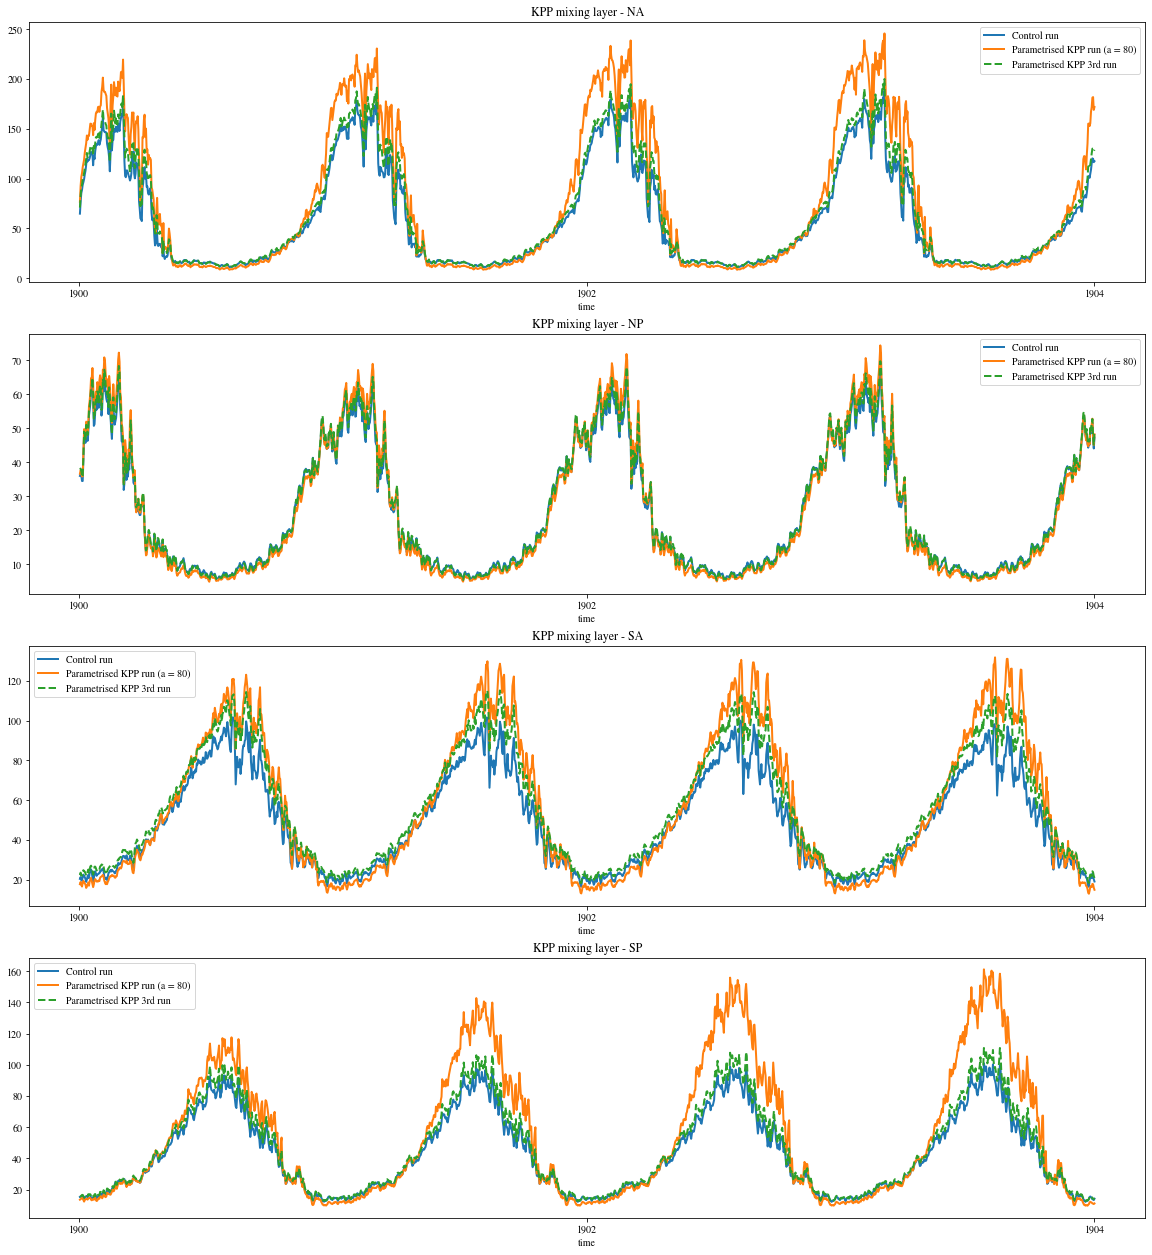

In [6]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

hblt_cont_NA.plot(ax = axes[0],label = 'Control run')
hblt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP 3rd run', ls = '--')
axes[0].legend()
axes[0].set_title('KPP mixing layer - NA')

hblt_cont_NP.plot(ax = axes[1],label = 'Control run')
hblt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP 3rd run', ls = '--')
axes[1].legend()
axes[1].set_title('KPP mixing layer - NP')

hblt_cont_SA.plot(ax = axes[2],label = 'Control run')
hblt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP 3rd run', ls = '--')
axes[2].legend()
axes[2].set_title('KPP mixing layer - SA')

hblt_cont_SP.plot(ax = axes[3],label = 'Control run')
hblt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP 3rd run', ls = '--')
axes[3].legend()
axes[3].set_title('KPP mixing layer - SP')

## Surface temperature

In [7]:
temp_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_temp', frequency = '1 daily')

In [8]:
temp_cont_NA = (temp_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NA = (temp_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_NA = (temp_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_NP = (temp_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NP = (temp_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_NP = (temp_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SA = (temp_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SA = (temp_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_SA = (temp_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SP = (temp_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SP = (temp_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_SP = (temp_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface temperature - SP')

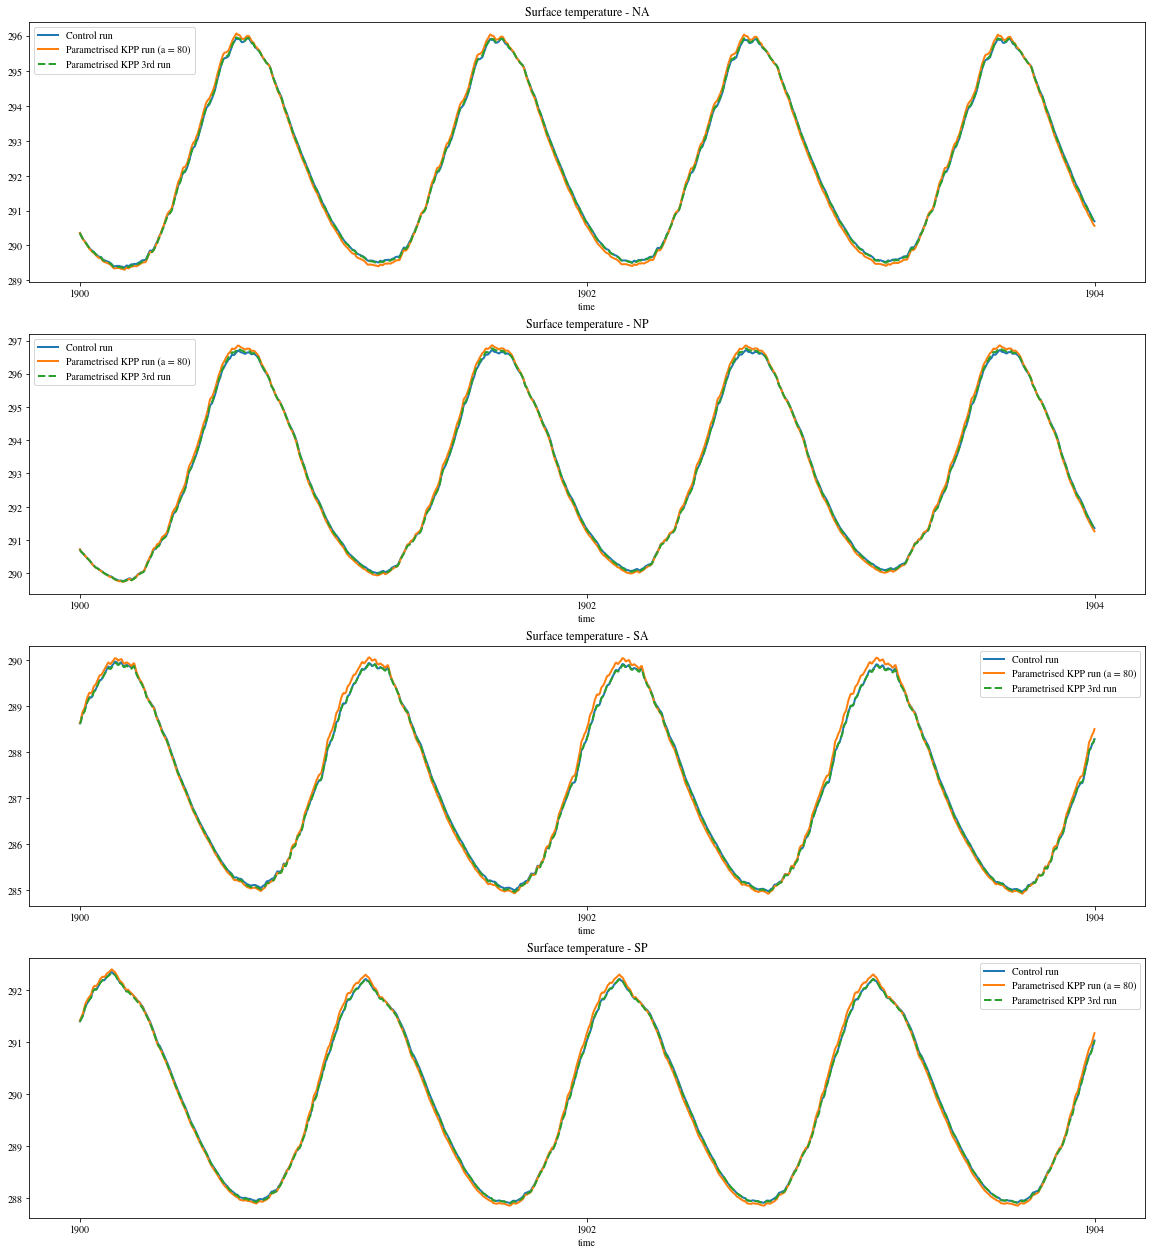

In [9]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

temp_cont_NA.plot(ax = axes[0],label = 'Control run')
temp_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
temp_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP 3rd run', ls = '--')
axes[0].legend()
axes[0].set_title('Surface temperature - NA')

temp_cont_NP.plot(ax = axes[1],label = 'Control run')
temp_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
temp_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP 3rd run', ls = '--')
axes[1].legend()
axes[1].set_title('Surface temperature - NP')

temp_cont_SA.plot(ax = axes[2],label = 'Control run')
temp_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
temp_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP 3rd run', ls = '--')
axes[2].legend()
axes[2].set_title('Surface temperature - SA')

temp_cont_SP.plot(ax = axes[3],label = 'Control run')
temp_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
temp_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP 3rd run', ls = '--')
axes[3].legend()
axes[3].set_title('Surface temperature - SP')

## Surface salinity

In [10]:
salt_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_salt', frequency = '1 daily')

In [11]:
salt_cont_NA = (salt_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NA = (salt_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_NA = (salt_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_NP = (salt_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NP = (salt_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_NP = (salt_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SA = (salt_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SA = (salt_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_SA = (salt_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SP = (salt_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SP = (salt_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_SP = (salt_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface salinity - SP')

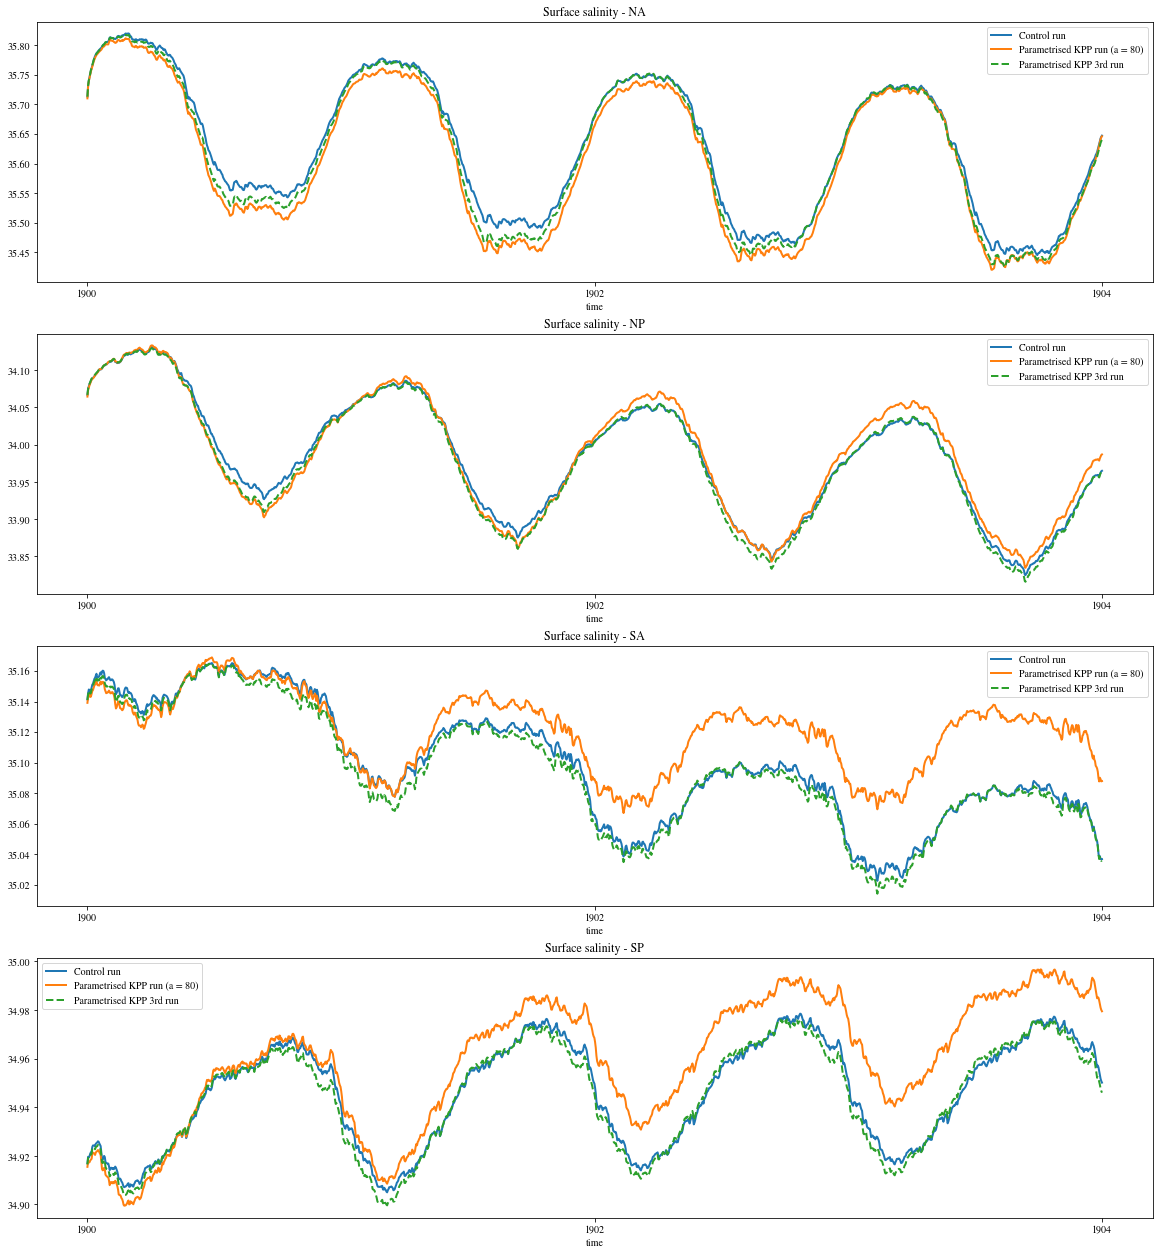

In [12]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

salt_cont_NA.plot(ax = axes[0],label = 'Control run')
salt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
salt_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP 3rd run', ls = '--')
axes[0].legend()
axes[0].set_title('Surface salinity - NA')

salt_cont_NP.plot(ax = axes[1],label = 'Control run')
salt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
salt_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP 3rd run', ls = '--')
axes[1].legend()
axes[1].set_title('Surface salinity - NP')

salt_cont_SA.plot(ax = axes[2],label = 'Control run')
salt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
salt_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP 3rd run', ls = '--')
axes[2].legend()
axes[2].set_title('Surface salinity - SA')

salt_cont_SP.plot(ax = axes[3],label = 'Control run')
salt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
salt_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP 3rd run', ls = '--')
axes[3].legend()
axes[3].set_title('Surface salinity - SP')

## Freshwater fluxes

In [13]:
pme_river_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'pme_river', frequency = '1 monthly')

In [14]:
pme_cont_NA = (pme_river_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NA = (pme_river_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_NA = (pme_river_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_NP = (pme_river_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NP = (pme_river_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_NP = (pme_river_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SA = (pme_river_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SA = (pme_river_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_SA = (pme_river_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SP = (pme_river_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SP = (pme_river_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_SP = (pme_river_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Freshwater input - SP')

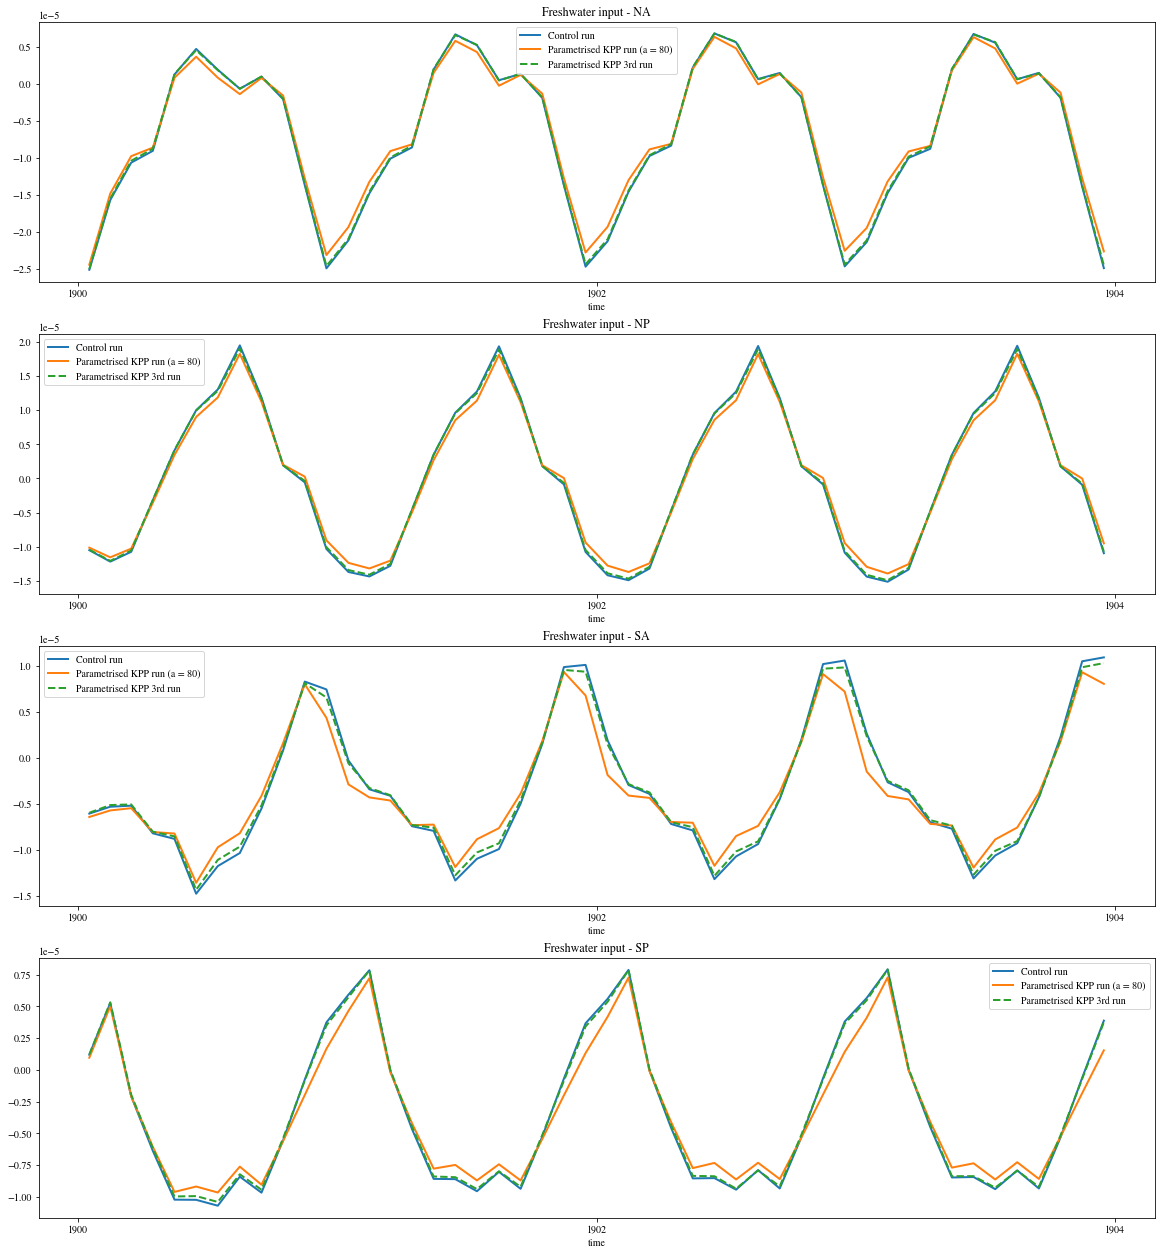

In [15]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

pme_cont_NA.plot(ax = axes[0],label = 'Control run')
pme_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
pme_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP 3rd run', ls = '--')
axes[0].legend()
axes[0].set_title('Freshwater input - NA')

pme_cont_NP.plot(ax = axes[1],label = 'Control run')
pme_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
pme_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP 3rd run', ls = '--')
axes[1].legend()
axes[1].set_title('Freshwater input - NP')

pme_cont_SA.plot(ax = axes[2],label = 'Control run')
pme_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
pme_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP 3rd run', ls = '--')
axes[2].legend()
axes[2].set_title('Freshwater input - SA')

pme_cont_SP.plot(ax = axes[3],label = 'Control run')
pme_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
pme_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP 3rd run', ls = '--')
axes[3].legend()
axes[3].set_title('Freshwater input - SP')

## Surface heat flux

In [7]:
heat_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')

In [8]:
heat_cont_NA = (heat_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NA = (heat_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_NA = (heat_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_NP = (heat_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NP = (heat_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_NP = (heat_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SA = (heat_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SA = (heat_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_SA = (heat_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SP = (heat_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SP = (heat_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_SP = (heat_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface heat flux - SP')

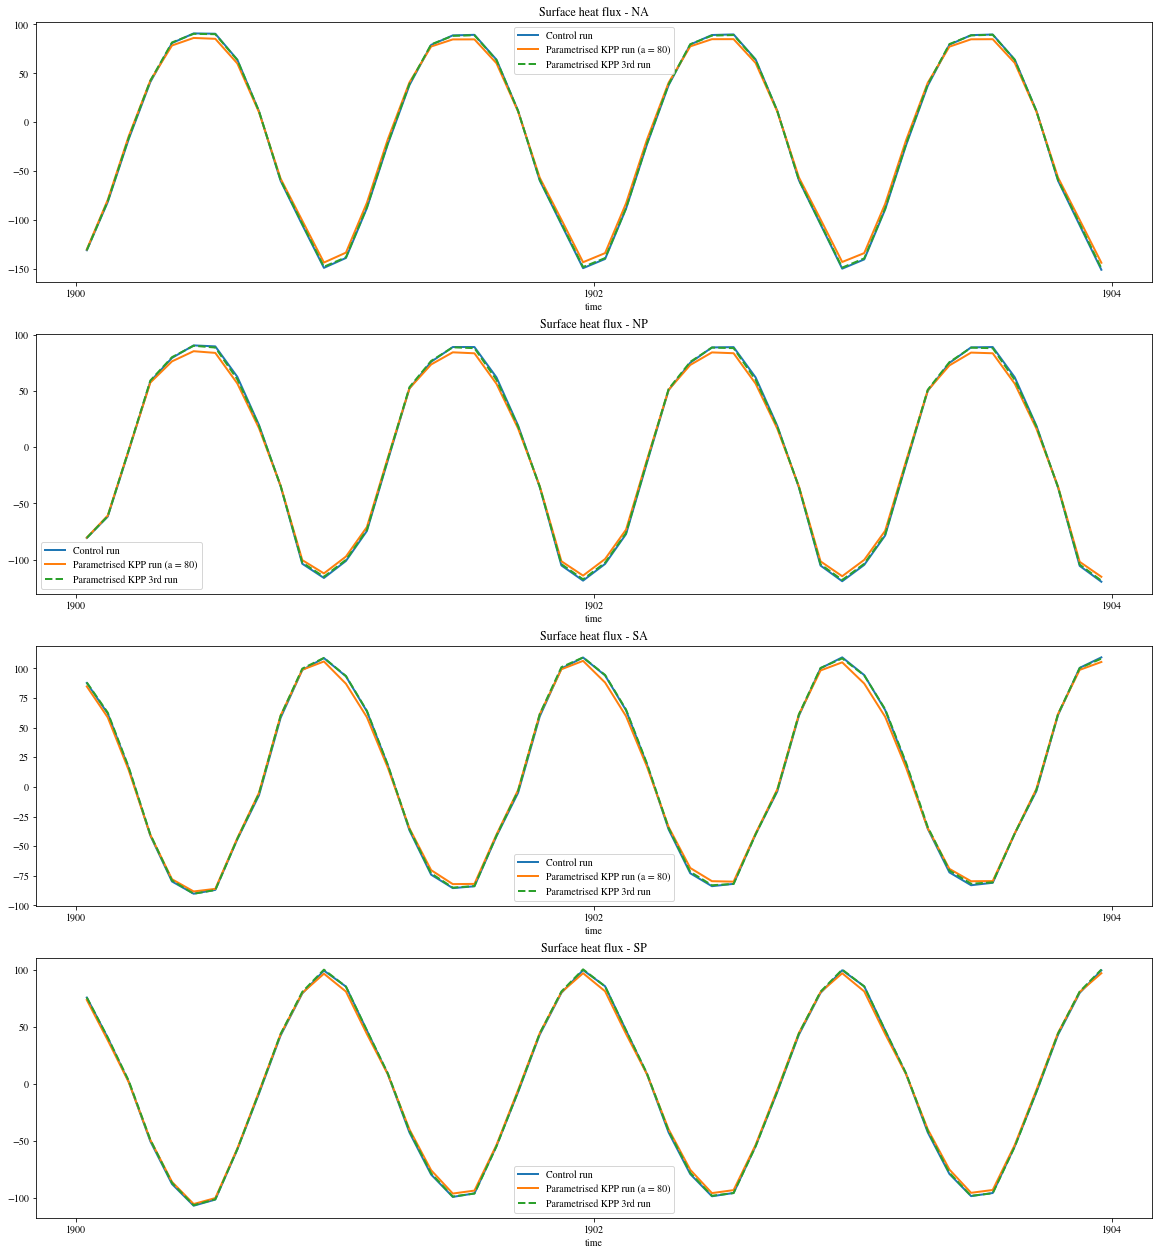

In [9]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

heat_cont_NA.plot(ax = axes[0],label = 'Control run')
heat_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
heat_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP 3rd run', ls = '--')
axes[0].legend()
axes[0].set_title('Surface heat flux - NA')

heat_cont_NP.plot(ax = axes[1],label = 'Control run')
heat_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
heat_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP 3rd run', ls = '--')
axes[1].legend()
axes[1].set_title('Surface heat flux - NP')

heat_cont_SA.plot(ax = axes[2],label = 'Control run')
heat_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
heat_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP 3rd run', ls = '--')
axes[2].legend()
axes[2].set_title('Surface heat flux - SA')

heat_cont_SP.plot(ax = axes[3],label = 'Control run')
heat_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
heat_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP 3rd run', ls = '--')
axes[3].legend()
axes[3].set_title('Surface heat flux - SP')

## Gyre strength

In [6]:
tx_trans_int_z_cont = cc.querying.getvar(expt[0], 'tx_trans_int_z', session)
ty_trans_int_z_cont = cc.querying.getvar(expt[0], 'ty_trans_int_z', session)
tx_trans_int_z_pram = cc.querying.getvar(expt[1], 'tx_trans_int_z', session)
ty_trans_int_z_pram = cc.querying.getvar(expt[1], 'ty_trans_int_z', session)
tx_trans_int_z_pra2 = cc.querying.getvar(expt[2], 'tx_trans_int_z', session)
ty_trans_int_z_pra2 = cc.querying.getvar(expt[2], 'ty_trans_int_z', session)

In [14]:
rho0 = 1025

x_min, x_max = -100, 10
y_min, y_max = 20, 65
ty_cont_NA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NA = ty_cont_NA.cumsum('xt_ocean').where(abs(ty_cont_NA<=1.e20))/(rho0*1.e6)
ty_pram_NA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NA = ty_pram_NA.cumsum('xt_ocean').where(abs(ty_pram_NA<=1.e20))/(rho0*1.e6)
ty_pra2_NA = ty_trans_int_z_pra2.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pra2_NA = ty_pra2_NA.cumsum('xt_ocean').where(abs(ty_pra2_NA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -100
y_min, y_max = 20, 65
ty_cont_NP = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NP = ty_cont_NP.cumsum('xt_ocean').where(abs(ty_cont_NP<=1.e20))/(rho0*1.e6)
ty_pram_NP = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NP = ty_pram_NP.cumsum('xt_ocean').where(abs(ty_pram_NP<=1.e20))/(rho0*1.e6)
ty_pra2_NP = ty_trans_int_z_pra2.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pra2_NP = ty_pra2_NP.cumsum('xt_ocean').where(abs(ty_pra2_NP<=1.e20))/(rho0*1.e6)

x_min, x_max = -70, 20
y_min, y_max = -65, -20
ty_cont_SA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SA = ty_cont_SA.cumsum('xt_ocean').where(abs(ty_cont_SA<=1.e20))/(rho0*1.e6)
ty_pram_SA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_SA = ty_pram_SA.cumsum('xt_ocean').where(abs(ty_pram_SA<=1.e20))/(rho0*1.e6)
ty_pra2_SA = ty_trans_int_z_pra2.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pra2_SA = ty_pra2_SA.cumsum('xt_ocean').where(abs(ty_pra2_SA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -80
y_min, y_max = -80, -20
tx_cont_SP = tx_trans_int_z_cont.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_cont_SP = -tx_cont_SP.cumsum('yt_ocean').where(abs(tx_cont_SP<=1.e20))/(rho0*1.e6)
tx_pram_SP = tx_trans_int_z_pram.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_pram_SP = -tx_pram_SP.cumsum('yt_ocean').where(abs(tx_pram_SP<=1.e20))/(rho0*1.e6)
tx_pra2_SP = tx_trans_int_z_pra2.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_pra2_SP = -tx_pra2_SP.cumsum('yt_ocean').where(abs(tx_pra2_SP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Barotropic Streamfunction (SP) - Parametrised KPP 3rd Run')

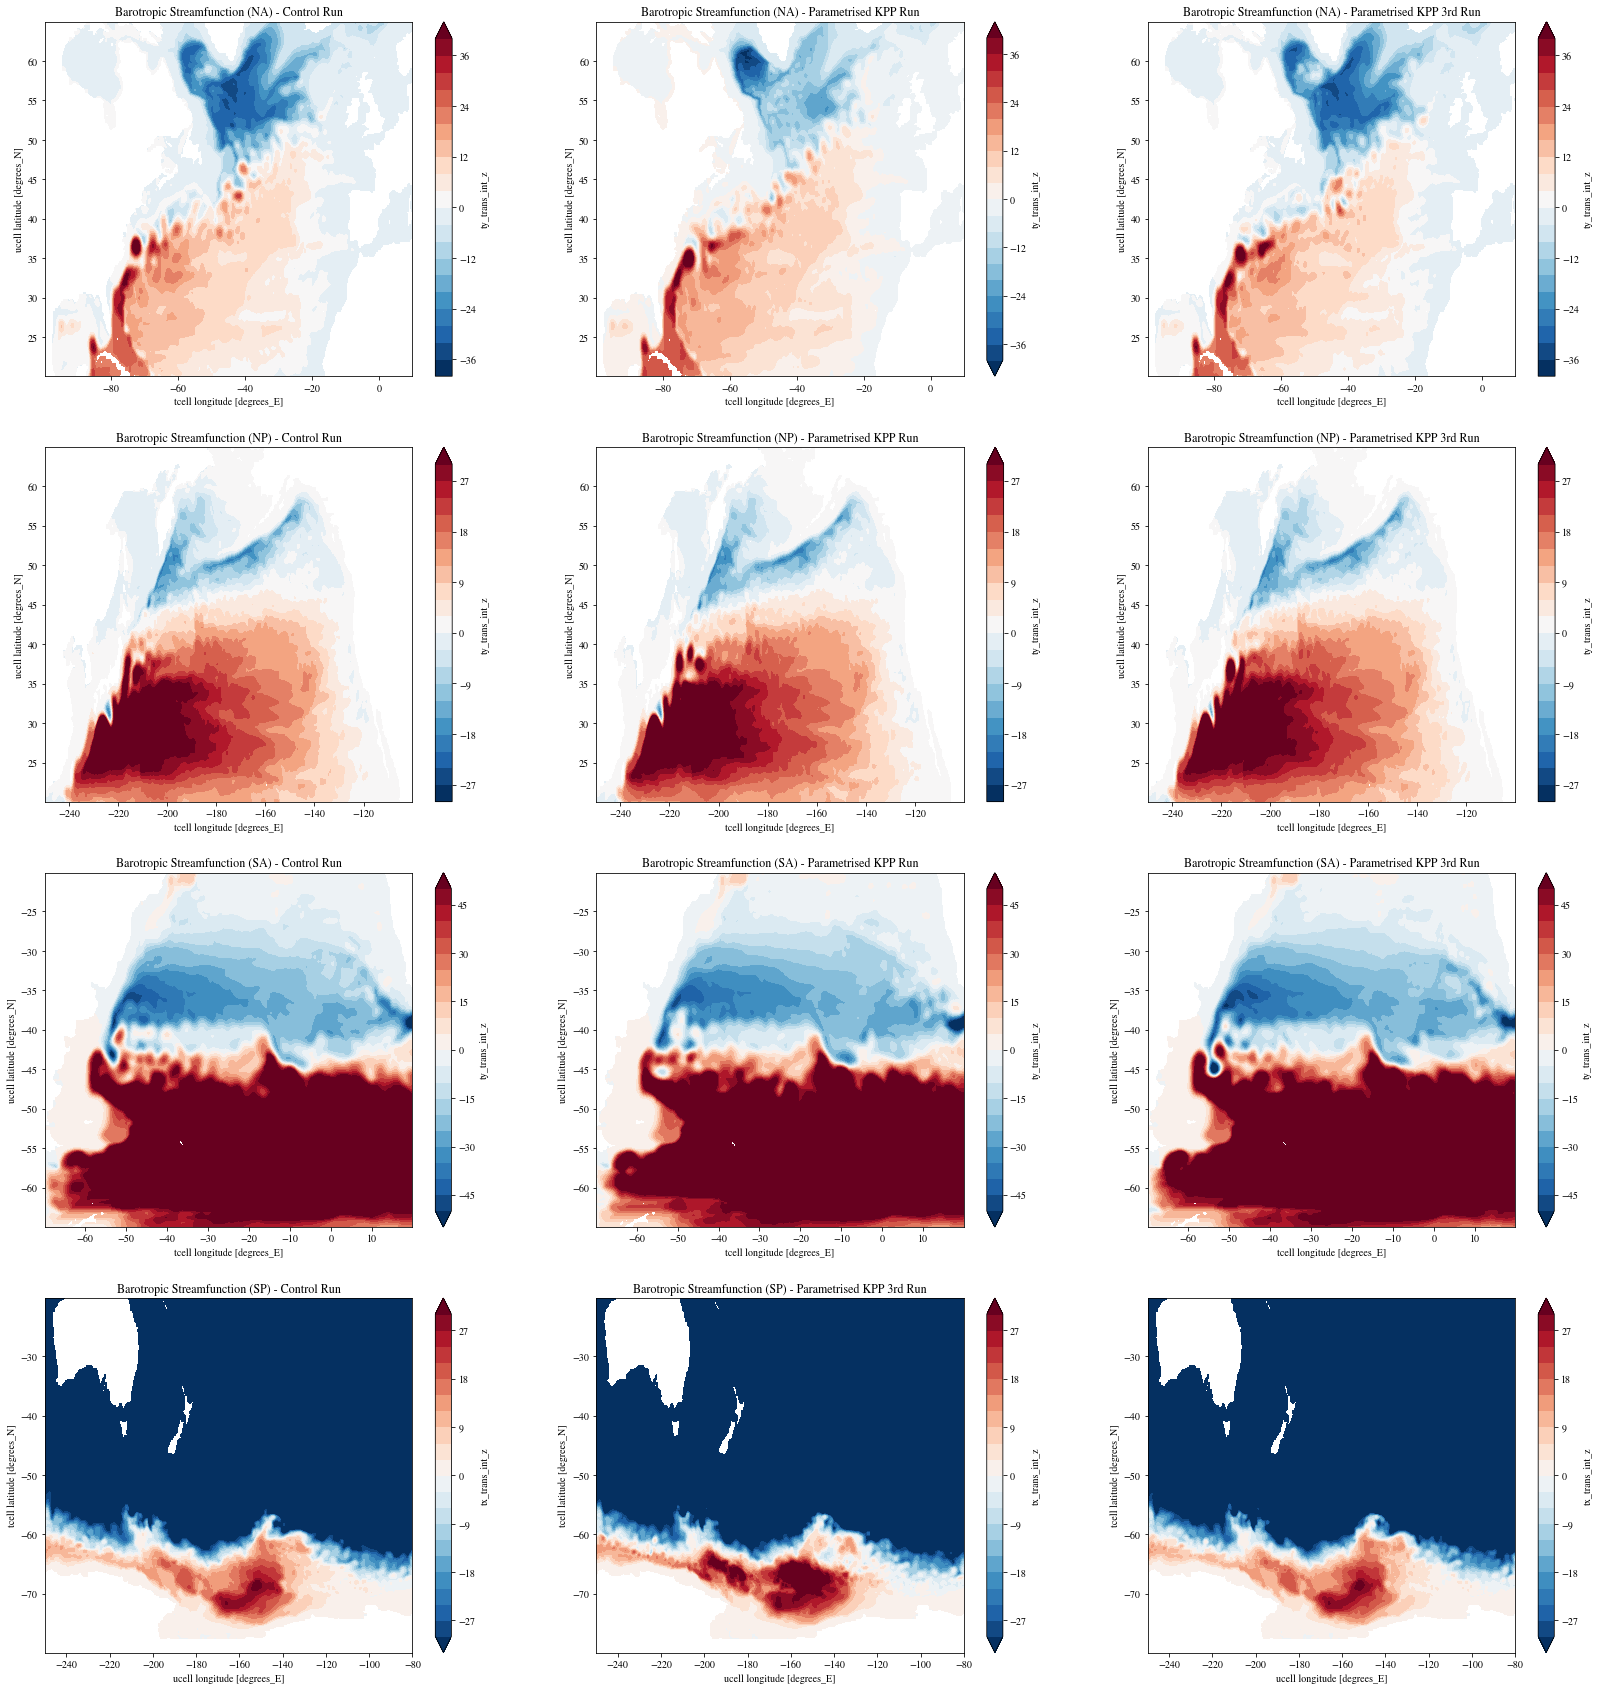

In [15]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (28,30))

psi_cont_NA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[0][0], levels = np.linspace(-30,30,21))
axes[0][0].set_title('Barotropic Streamfunction (NA) - Control Run')

psi_pram_NA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[0][1], levels = np.linspace(-40,30,21))
axes[0][1].set_title('Barotropic Streamfunction (NA) - Parametrised KPP Run')

psi_pra2_NA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[0][2], levels = np.linspace(-30,30,21))
axes[0][2].set_title('Barotropic Streamfunction (NA) - Parametrised KPP 3rd Run')

psi_cont_NP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[1][0], levels = np.linspace(-30,30,21))
axes[1][0].set_title('Barotropic Streamfunction (NP) - Control Run')

psi_pram_NP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[1][1], levels = np.linspace(-30,30,21))
axes[1][1].set_title('Barotropic Streamfunction (NP) - Parametrised KPP Run')

psi_pra2_NP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[1][2], levels = np.linspace(-30,30,21))
axes[1][2].set_title('Barotropic Streamfunction (NP) - Parametrised KPP 3rd Run')

psi_cont_SA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[2][0], levels = np.linspace(-50,50,21))
axes[2][0].set_title('Barotropic Streamfunction (SA) - Control Run')

psi_pram_SA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[2][1], levels = np.linspace(-50,50,21))
axes[2][1].set_title('Barotropic Streamfunction (SA) - Parametrised KPP Run')

psi_pra2_SA.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[2][2], levels = np.linspace(-50,50,21))
axes[2][2].set_title('Barotropic Streamfunction (SA) - Parametrised KPP 3rd Run')

psi_cont_SP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[3][0], levels = np.linspace(-30,30,21))
axes[3][0].set_title('Barotropic Streamfunction (SP) - Control Run')

psi_pram_SP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[3][1], levels = np.linspace(-30,30,21))
axes[3][1].set_title('Barotropic Streamfunction (SP) - Parametrised KPP Run')

psi_pra2_SP.sel(time = slice('1903-01-01','1903-12-31')).mean('time').plot.contourf(ax = axes[3][2], levels = np.linspace(-30,30,21))
axes[3][1].set_title('Barotropic Streamfunction (SP) - Parametrised KPP 3rd Run')

## Meridional Overturning Circulation

In [4]:
psi_cont = cc.querying.getvar(expt[0],'ty_trans_rho', session, start_time = '1903-01-01', end_time = '1903-12-31')
psi_cont = psi_cont.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_cont = psi_cont / (1e6*rho) # converts kg/s to Sv
psi_avg_cont = psi_cont.cumsum('potrho').mean('time') - psi_cont.sum('potrho').mean('time')

psi_pram = cc.querying.getvar(expt[1],'ty_trans_rho', session, start_time = '1903-01-01', end_time = '1903-12-31')
psi_pram = psi_pram.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_pram = psi_pram / (1e6*rho) # converts kg/s to Sv
psi_avg_pram = psi_pram.cumsum('potrho').mean('time') - psi_pram.sum('potrho').mean('time')

psi_pra2 = cc.querying.getvar(expt[2],'ty_trans_rho', session, start_time = '1903-01-01', end_time = '1903-12-31')
psi_pra2 = psi_pra2.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_pra2 = psi_pra2 / (1e6*rho) # converts kg/s to Sv
psi_avg_pra2 = psi_pra2.cumsum('potrho').mean('time') - psi_pra2.sum('potrho').mean('time')

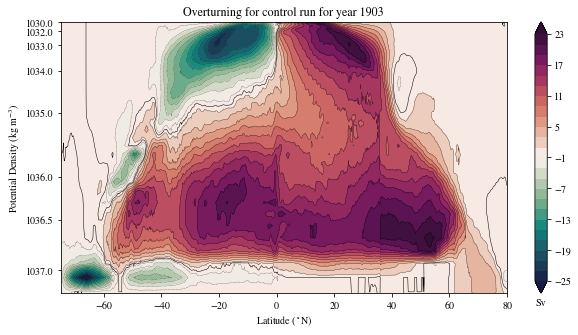

In [18]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-25,25,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1=ax.contourf(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont, cmap=cm.cm.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical')
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for control run for year 1903');

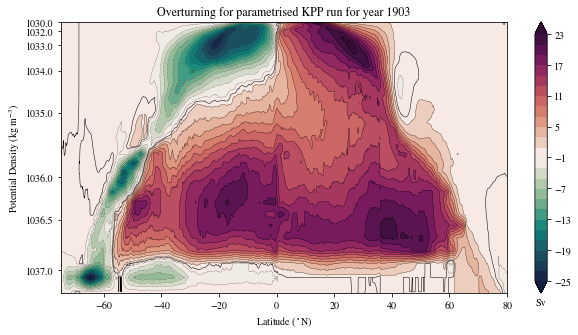

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-25,25,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1=ax.contourf(psi_avg_pram.grid_yu_ocean,(psi_avg_pram.potrho-1028)**scfac, psi_avg_pram, cmap=cm.cm.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical')
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_pram.grid_yu_ocean,(psi_avg_pram.potrho-1028)**scfac, psi_avg_pram, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_pram.grid_yu_ocean,(psi_avg_pram.potrho-1028)**scfac, psi_avg_pram, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for parametrised KPP run for year 1903');

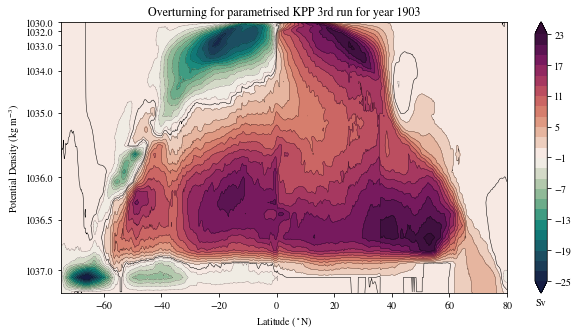

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-25,25,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1=ax.contourf(psi_avg_pra2.grid_yu_ocean,(psi_avg_pra2.potrho-1028)**scfac, psi_avg_pra2, cmap=cm.cm.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical')
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_pra2.grid_yu_ocean,(psi_avg_pra2.potrho-1028)**scfac, psi_avg_pra2, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_pra2.grid_yu_ocean,(psi_avg_pra2.potrho-1028)**scfac, psi_avg_pra2, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for parametrised KPP 3rd run for year 1903');

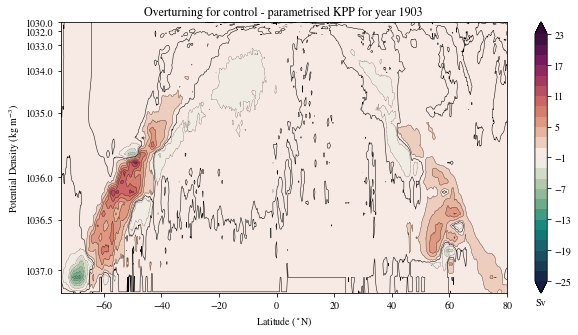

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-5,5,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1 = ax.contourf(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pram, cmap=cm.cm.curl, levels=clev, extend='both')
cb = plt.colorbar(p1,orientation='vertical')
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pram, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pram, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for control - parametrised KPP for year 1903');

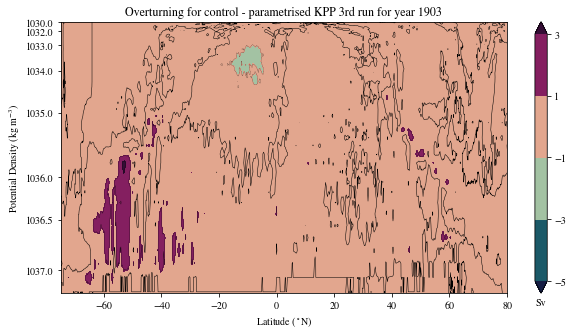

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-5,5,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1 = ax.contourf(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pra2, cmap=cm.cm.curl, levels=clev, extend='both')
cb = plt.colorbar(p1,orientation='vertical')
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pra2, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_cont.grid_yu_ocean,(psi_avg_cont.potrho-1028)**scfac, psi_avg_cont - psi_avg_pra2, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for control - parametrised KPP 3rd run for year 1903');